# CAR PRICE PREDICTION

#### DATA COLLECTION

In [335]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [336]:
df = pd.read_csv("data/car data.csv")

In [337]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [338]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [339]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [340]:
df.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Driven_kms         int64
Fuel_Type         object
Selling_type      object
Transmission      object
Owner              int64
dtype: object

#### DATA CLEANING AND PREPROCESSING

In [341]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [342]:
# changing the Year column to represent the age of the car which is more useful for analysis

df['Car_Age'] = 2025 - df['Year']
df.drop(columns=['Year'], inplace=True, axis=1)

In [343]:
# dropping the Car_Name column as it is not useful for analysis

df.drop(columns=['Car_Name'], inplace=True, axis=1)

In [344]:
df['Selling_type'].value_counts()

Selling_type
Dealer        195
Individual    106
Name: count, dtype: int64

In [345]:
df['Selling_type'] = df['Selling_type'].map({'Dealer': 0, 'Individual': 1})

In [346]:
df['Transmission'].value_counts()

Transmission
Manual       261
Automatic     40
Name: count, dtype: int64

In [347]:
df['Transmission'] = df['Transmission'].map({'Manual': 0, 'Automatic': 1})

In [348]:
df['Fuel_Type'].value_counts()

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64

In [349]:
df['Fuel_Type'] = df['Fuel_Type'].map({'Petrol': 0, 'Diesel': 1, 'CNG': 2})

In [350]:
df.head()

,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Car_Age
0,3.35,5.59,27000,0,0,0,0,11
1,4.75,9.54,43000,1,0,0,0,12
2,7.25,9.85,6900,0,0,0,0,8
3,2.85,4.15,5200,0,0,0,0,14
4,4.60,6.87,42450,1,0,0,0,11


### EXPLORATORY DATA ANALYSIS

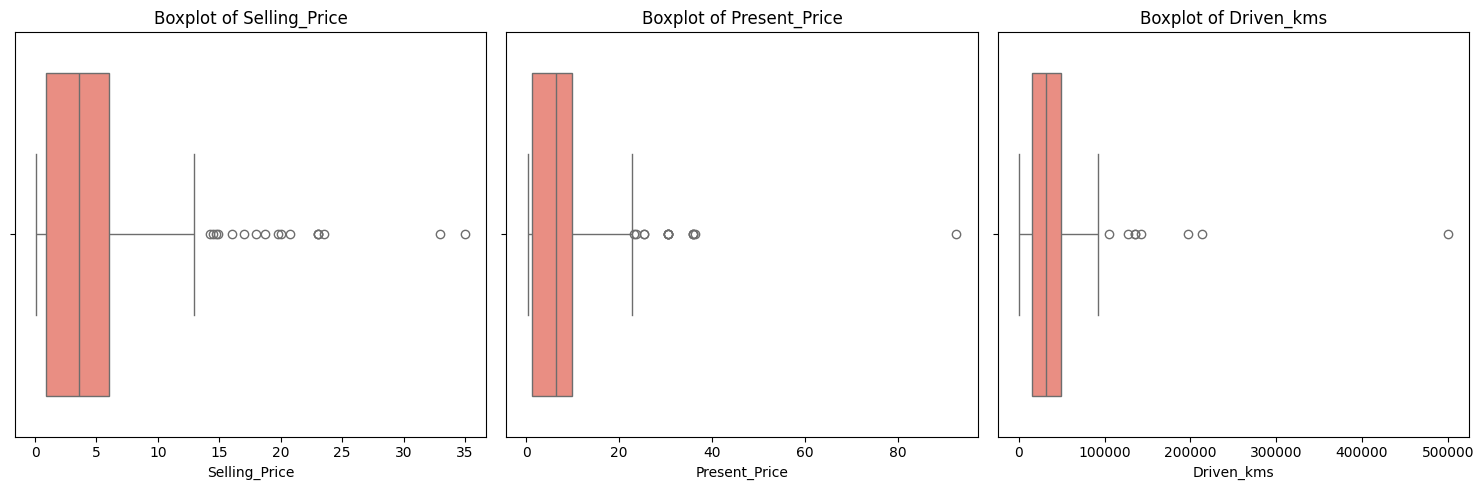

In [351]:
num_cols = ['Selling_Price', 'Present_Price', 'Driven_kms']
plt.figure(figsize=(15, 5))

for i, col in enumerate(num_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x=df[col], color='salmon')
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.savefig("Outputs/boxplots_Before_Outliers_Handling.png")
plt.show()

In [352]:
# Function to remove outliers using IQR method
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return filtered_df

print("Before removing outliers:", df.shape)
# remove outliers from the numerical columns
for col in ['Selling_Price', 'Present_Price', 'Driven_kms']:
    df = remove_outliers_iqr(df, col)
    print(f"Removed outliers from {col}")

print("After removing outliers:", df.shape)

Before removing outliers: (301, 8)
Removed outliers from Selling_Price
Removed outliers from Present_Price
Removed outliers from Driven_kms
After removing outliers: (276, 8)


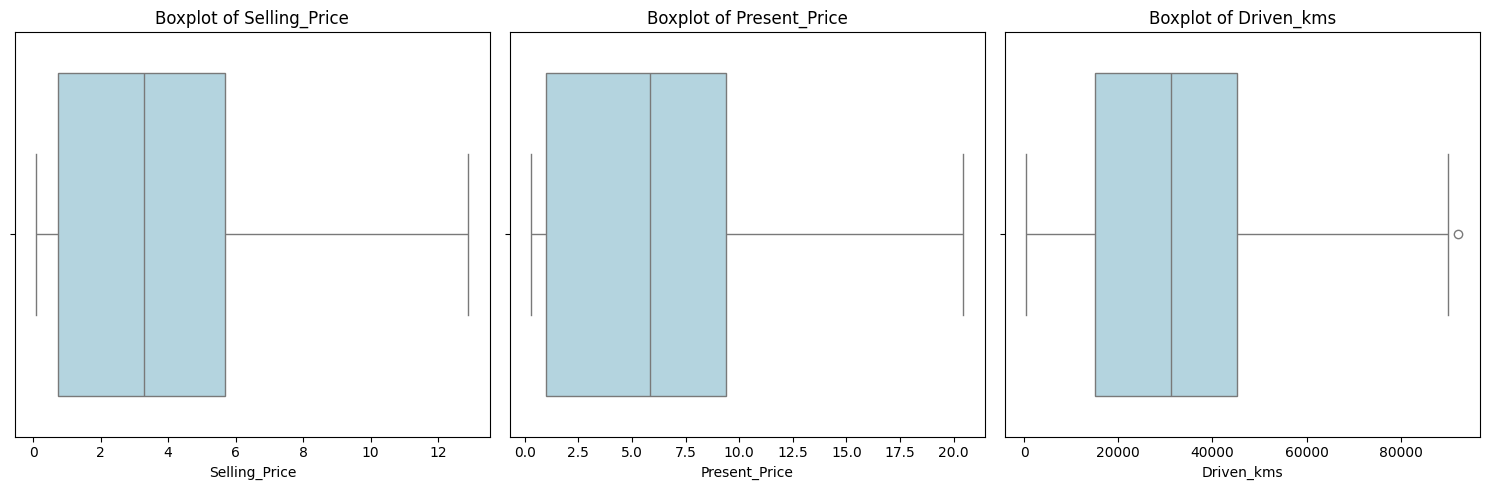

In [353]:
num_cols = ['Selling_Price', 'Present_Price', 'Driven_kms']
plt.figure(figsize=(15, 5))

for i, col in enumerate(num_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x=df[col], color='lightblue')
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.savefig("Outputs/boxplots_After_Outliers_Handling.png")
plt.show()

#### Univariate Plots

C:\Users\Anshuman Singh\AppData\Local\Temp\ipykernel_4568\47210436.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Car_Age', data=df, palette='viridis')


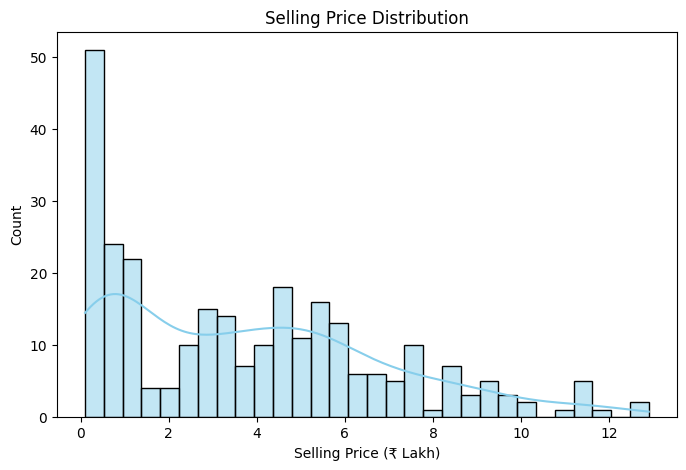

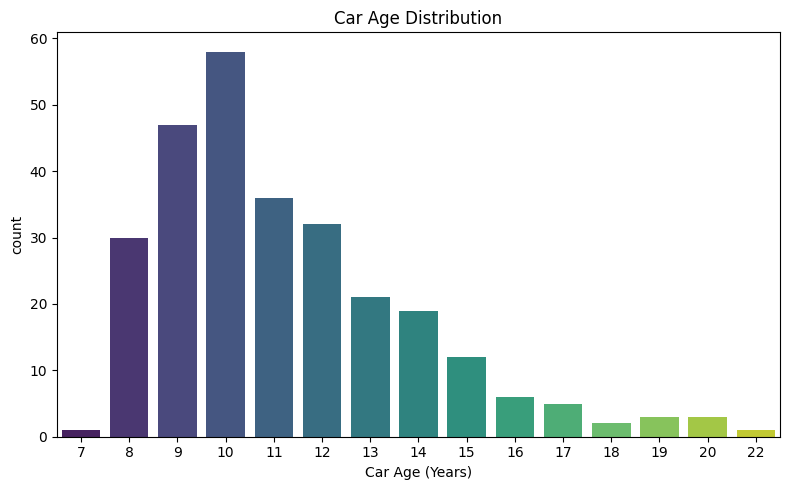

In [354]:
# Selling Price
plt.figure(figsize=(8, 5))
sns.histplot(df['Selling_Price'], kde=True, bins=30, color='skyblue')
plt.title("Selling Price Distribution")
plt.xlabel("Selling Price (₹ Lakh)")
plt.savefig('Outputs/Selling_Price_Distribution.png')

# Car Age
plt.figure(figsize=(8, 5))
sns.countplot(x='Car_Age', data=df, palette='viridis')
plt.title("Car Age Distribution")
plt.xlabel("Car Age (Years)")
plt.savefig('Outputs/Car_Age_Distribution.png')

plt.tight_layout()
plt.show()

#### Bivariate Plots

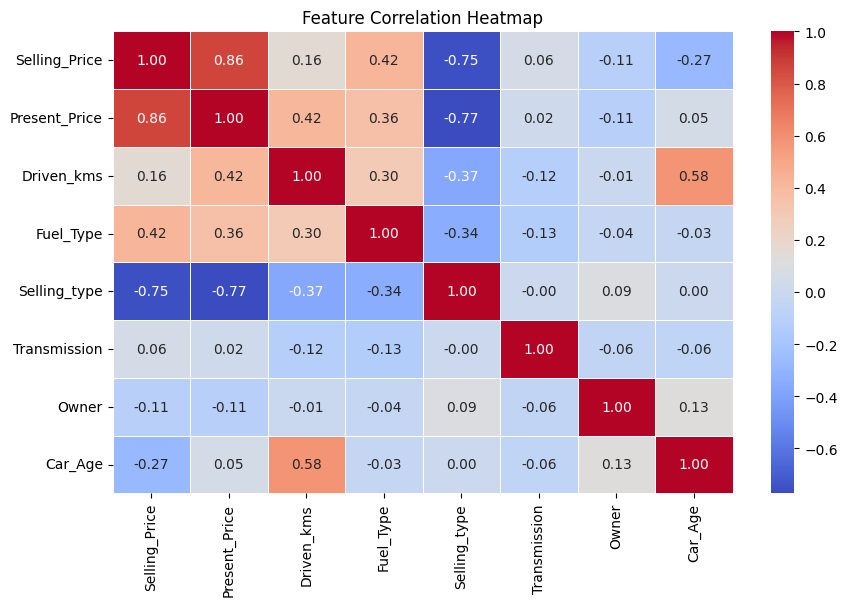

In [355]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.savefig('Outputs/Feature_Correlation_Heatmap.png')
plt.show()

| Feature         | Correlation with Selling_Price | Takeaways                                                  |
| --------------- | ------------------------------ | ---------------------------------------------------------- |
| `Present_Price` | 0.86                           | Strong positive correlation meaning high impact on prediction.   |
| `Selling_type`  | -0.75                          | Strong negative correlation.                               |
| `Fuel_Type`     | 0.42                           | Moderate influence.                                        |
| `Car_Age`       | -0.27                          | Newer cars → higher selling price.                         |
| `Driven_kms`    | 0.16                           | Weak influence (surprisingly).                             |
| `Transmission`  | 0.06                           | Negligible effect.                                         |
| `Owner`         | -0.11                          | Minor impact.                                              |


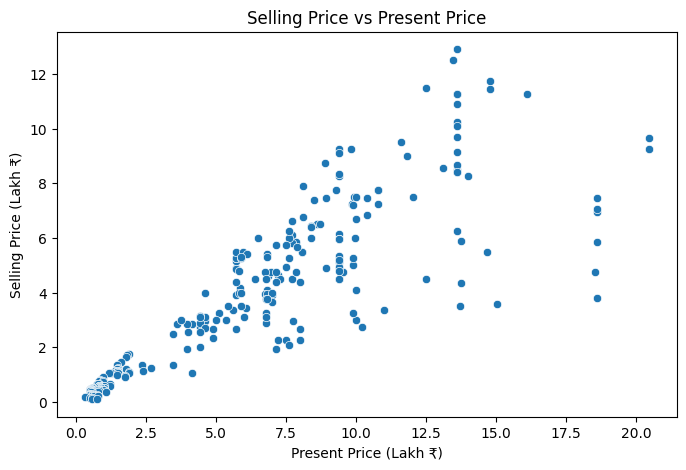

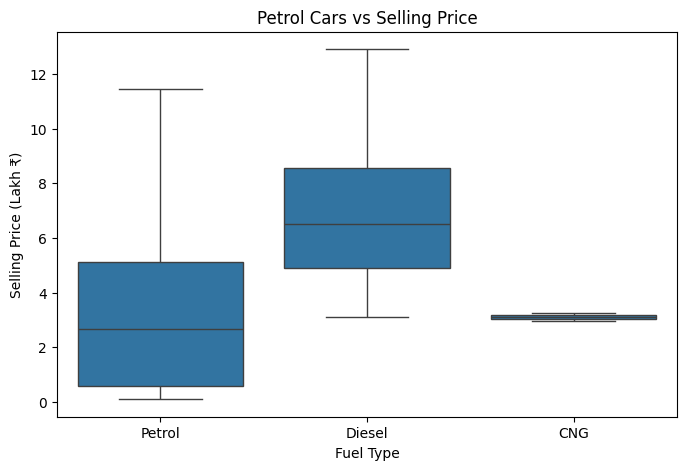

C:\Users\Anshuman Singh\AppData\Local\Temp\ipykernel_4568\1977810105.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Car_Age', y='Selling_Price', data=df, palette='Set2')


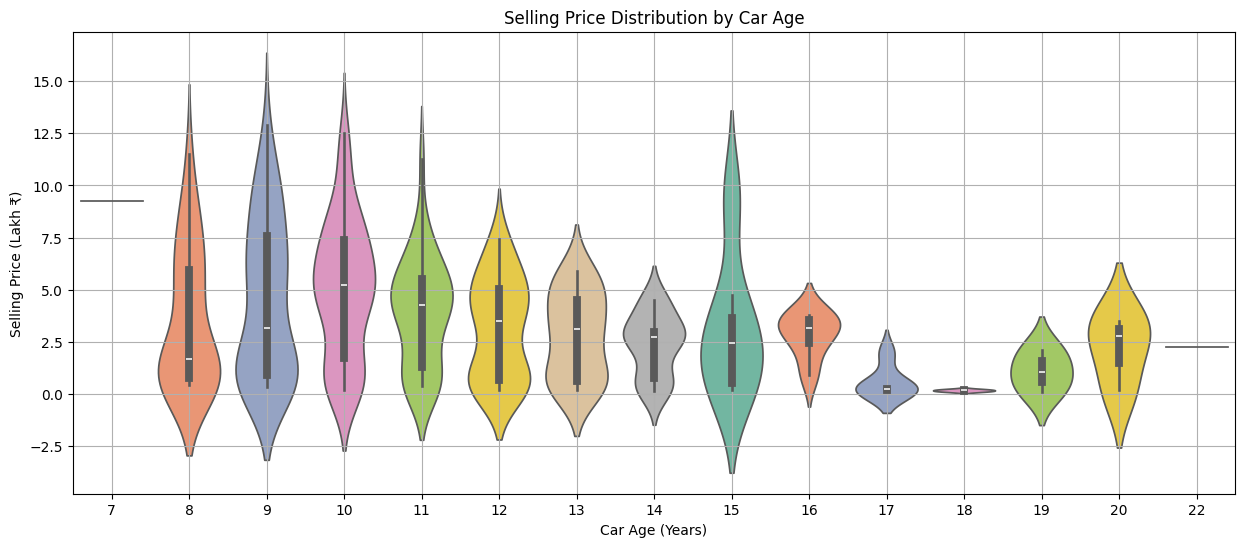

C:\Users\Anshuman Singh\AppData\Local\Temp\ipykernel_4568\1977810105.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Selling_type', y='Selling_Price', data=df, palette='Set1')


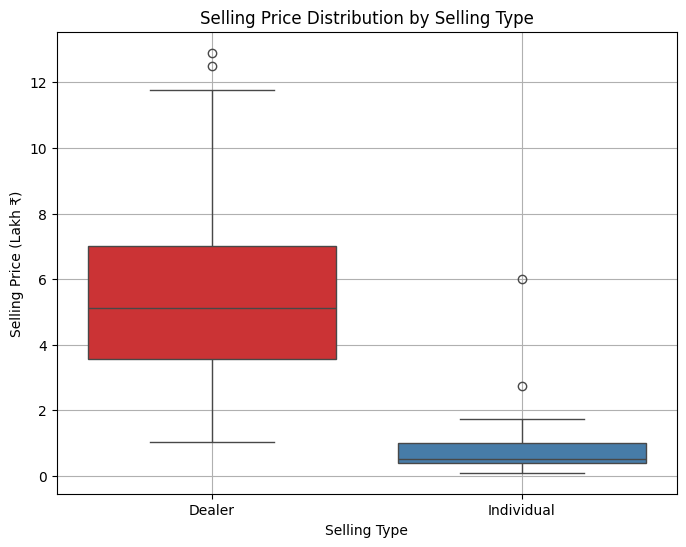

In [356]:
# Selling Price vs Present Price
plt.figure(figsize=(8,5))
sns.scatterplot(x='Present_Price', y='Selling_Price', data=df)
plt.title("Selling Price vs Present Price")
plt.xlabel("Present Price (Lakh ₹)")
plt.ylabel("Selling Price (Lakh ₹)")
plt.savefig('Outputs/Selling_Price_vs_Present_Price.png')
plt.show()

# Fuel Type vs Selling Price
plt.figure(figsize=(8,5))
sns.boxplot(x='Fuel_Type', y='Selling_Price', data=df)
plt.title("Petrol Cars vs Selling Price")
plt.xlabel("Fuel Type")
plt.ylabel("Selling Price (Lakh ₹)")
plt.xticks(ticks=[0, 1, 2], labels=['Petrol', 'Diesel', 'CNG'])
plt.savefig('Outputs/Fuel_Type_vs_Selling_Price.png')
plt.show()

# Car_Age vs Selling Price
plt.figure(figsize=(15, 6))
sns.violinplot(x='Car_Age', y='Selling_Price', data=df, palette='Set2')
plt.title('Selling Price Distribution by Car Age')
plt.ylabel('Selling Price (Lakh ₹)')
plt.xlabel('Car Age (Years)')
plt.grid(True)
plt.savefig('Outputs/Selling_Price_by_Transmission.png')
plt.show()

# Selling Type vs Selling Price
plt.figure(figsize=(8, 6))
sns.boxplot(x='Selling_type', y='Selling_Price', data=df, palette='Set1')
plt.title('Selling Price Distribution by Selling Type')
plt.ylabel('Selling Price (Lakh ₹)')
plt.xlabel('Selling Type')
plt.xticks(ticks=[0, 1], labels=['Dealer', 'Individual'])
plt.grid(True)
plt.savefig('Outputs/Selling_Price_by_Selling_Type.png')
plt.show()


In [357]:
# we will select the features with high correlation with Selling_Price
features = ['Present_Price', 'Car_Age', 'Fuel_Type', 'Selling_type']
target = 'Selling_Price'

X = df[features]
y = df[target]

In [358]:
# Train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### TRAINING REGRESSION MODEL

In [359]:
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score
    
Evaluation_scores = {}

In [360]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression()
LR.fit(X_train, y_train)

# Predicting on the test set
y_pred = LR.predict(X_test)

# Storing evaluation scores
Evaluation_scores['Linear Regression'] = {
    'MAE': mean_absolute_error(y_test, y_pred),
    'RMSE': root_mean_squared_error(y_test, y_pred),
    'R2 Score': r2_score(y_test, y_pred),
}

print("Linear Regression Evaluation Scores:")
for metric, score in Evaluation_scores['Linear Regression'].items():
    print(f"{metric}: {score:.2f}")

Linear Regression Evaluation Scores:
MAE: 0.93
RMSE: 1.14
R2 Score: 0.85


| Metric       | Value | Interpretation                                                                                                        |
| ------------ | ----- | --------------------------------------------------------------------------------------------------------------------- |
| **MAE**      | 0.93  | On average, the model is off by around Rs. 93,000. That's quite reasonable depending on car price range.              |
| **RMSE**     | 1.14  | Penalizes larger errors more; still quite low, which is great.                                                        |
| **R² Score** | 0.85  | The model explains 85% of the variance in the selling price. Quite good for base models                               |


In [361]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR


# List of models to evaluate
s_models = {
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
}

ns_models = {
    'Random Forest Regressor': RandomForestRegressor(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Lineas SVR': SVR(kernel='linear'),
    'Polynomial SVR': SVR(kernel='poly'),
    'RBF SVR': SVR(kernel='rbf'),
    'Gradient Boosting Regressor': GradientBoostingRegressor(),
}

In [362]:
def evaluate_on_non_standardised_data(models, X_train, y_train, X_test, y_test, print_results=True):
    
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        Evaluation_scores[model_name] = {
            'MAE': mean_absolute_error(y_test, y_pred),
            'RMSE': root_mean_squared_error(y_test, y_pred),
            'R2 Score': r2_score(y_test, y_pred),
        }
    if print_results:
        print("Evaluation Scores on Non-Standardised Data:")
        for model_name, scores in Evaluation_scores.items():
            print(f"{model_name}:")
            for metric, score in scores.items():
                print(f"  {metric}: {score:.2f}")
            print()
    return

In [363]:
def evaluate_on_standardised_data(models, X_train, y_train, X_test, y_test, print_results=True):
    from sklearn.preprocessing import StandardScaler
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
        
    for model_name, model in models.items():
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        
        Evaluation_scores[model_name] = {
            'MAE': mean_absolute_error(y_test, y_pred),
            'RMSE': root_mean_squared_error(y_test, y_pred),
            'R2 Score': r2_score(y_test, y_pred),
        }
    
    if print_results:
        print("Evaluation Scores on Standardised Data:")
        for model_name, scores in Evaluation_scores.items():
            print(f"{model_name}:")
            for metric, score in scores.items():
                print(f"  {metric}: {score:.2f}")
            print()
    
    return

In [364]:
# train models on standardised data
evaluate_on_standardised_data(s_models, X_train, y_train, X_test, y_test, print_results=False)

# train models on non-standardised data
evaluate_on_non_standardised_data(ns_models, X_train, y_train, X_test, y_test, print_results=False)


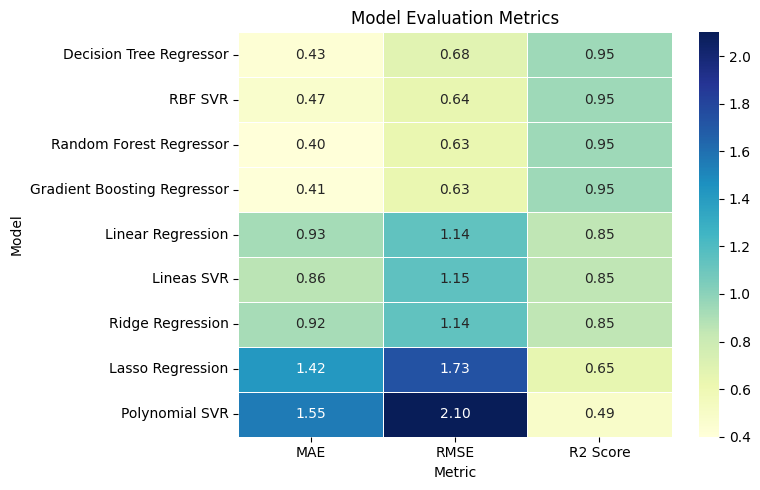

In [365]:
"""
    Creating dataframes for evaluation scores for visual representation
"""

Evaluation_scores_df = pd.DataFrame(Evaluation_scores).T    # transpose the DataFrame to have models as rows and metrics as columns
Evaluation_scores_df = Evaluation_scores_df.round(2)
Evaluation_scores_df = Evaluation_scores_df.sort_values(by='R2 Score', ascending=False) # sort by R2 Score

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.heatmap(Evaluation_scores_df, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=0.5)
plt.title('Model Evaluation Metrics')
plt.xlabel('Metric')
plt.ylabel('Model')
plt.tight_layout()
plt.savefig('Outputs/Model_Evaluation_Metrics_Heatmap.png')
plt.show()

<strong>Since the Random Forest Regressor, RBF SVR and Gradient Boosting Regressor are performing the best aamong the chosen models, we'll tune only these models.</strong>

#### HYPERPARAMETER TUNING

In [366]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Parameter grids
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

param_grid_gb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5]
}

param_grid_svr = {
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.5],
    'kernel': ['rbf'],
    'gamma': ['scale', 'auto']
}

# Instantiate models
rf_model = RandomForestRegressor(random_state=42)
gb_model = GradientBoostingRegressor(random_state=42)
svr_model = SVR()

# Standardize the data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X_train)

# Randomized Search for Random Forest
rf_search = RandomizedSearchCV(rf_model, param_distributions=param_grid_rf, cv=5, scoring='r2', n_jobs=-1)
gb_search = RandomizedSearchCV(gb_model, param_distributions=param_grid_gb, cv=5, scoring='r2', n_jobs=-1)
svr_search = RandomizedSearchCV(svr_model, param_distributions=param_grid_svr, cv=5, scoring='r2', n_jobs=-1)

# Fit the models
rf_search.fit(X_train, y_train)
gb_search.fit(X_train, y_train)
svr_search.fit(x_scaled, y_train)

# get best parameters and scores
performance_results = {
    'Random Forest': {
        'Best Parameters': rf_search.best_params_,
        'Best Score': rf_search.best_score_
    },
    'Gradient Boosting': {
        'Best Parameters': gb_search.best_params_,
        'Best Score': gb_search.best_score_
    },
    'SVR': {
        'Best Parameters': svr_search.best_params_,
        'Best Score': svr_search.best_score_
    }
}

# Display the performance results
for model, results in performance_results.items():
    print(f"{model}:")
    print(f"  Best Parameters: {results['Best Parameters']}")
    print(f"  Best Score: {results['Best Score']:.4f}\n")

c:\Users\Anshuman Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Random Forest:
  Best Parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 10}
  Best Score: 0.9409

Gradient Boosting:
  Best Parameters: {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.05}
  Best Score: 0.9572

SVR:
  Best Parameters: {'kernel': 'rbf', 'gamma': 'auto', 'epsilon': 0.1, 'C': 10}
  Best Score: 0.9573



In [367]:
# Reinstantiate models with best params
rf_best = RandomForestRegressor(**rf_search.best_params_, random_state=42)
gb_best = GradientBoostingRegressor(**gb_search.best_params_, random_state=42)
svr_best = SVR(**svr_search.best_params_)

# Fit models
rf_best.fit(X_train, y_train)
gb_best.fit(X_train, y_train)
svr_best.fit(x_scaled, y_train)

# Predict
rf_pred = rf_best.predict(X_test)
gb_pred = gb_best.predict(X_test)
svr_pred = svr_best.predict(scaler.transform(X_test))  # Scale test set for SVR

In [368]:
def eval_metrics(y_true, y_pred):
    return {
        'MAE': mean_absolute_error(y_true, y_pred),
        'RMSE': root_mean_squared_error(y_true, y_pred),
        'R2 Score': r2_score(y_true, y_pred)
    }

Evaluation_scores = {}
Evaluation_scores['Random Forest Tuned'] = eval_metrics(y_test, rf_pred)
Evaluation_scores['Gradient Boosting Tuned'] = eval_metrics(y_test, gb_pred)
Evaluation_scores['SVR Tuned'] = eval_metrics(y_test, svr_pred)

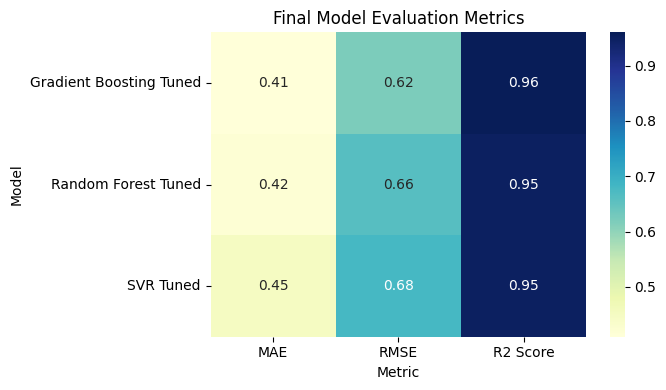

In [369]:
# Visualize the evaluation scores
eval_df = pd.DataFrame(Evaluation_scores).T

eval_df = eval_df.sort_values(by='R2 Score', ascending=False)  # sort by R2 Score
eval_df = eval_df.round(2)  # round the values for better readability

# Heatmap
plt.figure(figsize=(7, 4))
sns.heatmap(eval_df, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Final Model Evaluation Metrics")
plt.xlabel("Metric")
plt.ylabel("Model")
plt.savefig('Outputs/Final_Model_Evaluation_Metrics.png')
plt.tight_layout()
plt.show()

| Model                 | MAE  | RMSE | R² Score |
| --------------------- | ---- | ---- | -------- |
| **Gradient Boosting** | 0.41 | 0.62 | **0.96** |
| **Random Forest**     | 0.41 | 0.67 | 0.95     |
| **SVR (Tuned)**       | 0.45 | 0.68 | 0.95     |


**Gradient Boosting is the Best Overall Model**
- Highest R² Score (0.96): Explains 96% of the variance in the selling price — excellent fit.
- Lowest RMSE (0.62): Indicates predictions are closest to actual values (off by Rs. 62k).
- It balances bias and variance better than others.

**Random Forest is a Close Runner-up**
- Performs almost equally well but with slightly higher RMSE (0.67).
- More robust to outliers and overfitting, and easier to parallelize.
- Might be preferred if training time or interpretability matters.

**SVR Underperforms Slightly**
- Despite hyperparameter tuning, SVR's MAE and RMSE are higher.
- Sensitive to scaling, and its performance suggests it may not model complex nonlinearities as effectively as tree-based models in this dataset.
- Still, R² of 0.95 shows it’s respectable.

In [370]:
# Finalising the gradient boosting model
final_model = GradientBoostingRegressor(**gb_search.best_params_, random_state=42)
final_model.fit(X_train, y_train)

# Predicting on the test set with the final model
y_final_pred = final_model.predict(X_test)

# Evaluating the final model
final_evaluation_scores = eval_metrics(y_test, y_final_pred)
print("Final Model Evaluation Scores:")
for metric, score in final_evaluation_scores.items():
    print(f"{metric}: {score:.2f}")

# Save the final model using joblib
import joblib
joblib.dump(final_model, 'Outputs/final_model.pkl')

Final Model Evaluation Scores:
MAE: 0.41
RMSE: 0.62
R2 Score: 0.96


['Outputs/final_model.pkl']